<a href="https://colab.research.google.com/github/jaofavero/Indentificador-de-textos/blob/main/Projeto_de_uso_do_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparar Ambiente

## Instalando

In [ ]:
!pip install opencv-python
!sudo apt install tesseract-ocr
!pip install pytesseract==0.3.9


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 33 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (5,146 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

## Adicionando linguas


In [ ]:
!mkdir tessdata
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

--2024-02-15 20:12:28--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata [following]
--2024-02-15 20:12:28--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2024-02-15 20:12:28--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awa

## Importe

In [ ]:
import pytesseract
import numpy as np
import cv2
import re
import os
import matplotlib.pyplot as plt

from PIL import ImageFont, ImageDraw, Image
from pytesseract import Output
from google.colab.patches import cv2_imshow


# Funções e Variaveis iniciais

In [28]:
conteudo = "/content/Imagens" #Onde estão as imagens
caminho = [os.path.join(conteudo, f) for f in os.listdir(conteudo)]
print(caminho)

['/content/Imagens/Resumo1.jpg', '/content/Imagens/Resumo2.jpg', '/content/Imagens/rpg1.jpg', '/content/Imagens/rpg2.jpg']


In [29]:
fonte_dir = '/content/Fonts/calibri.ttf'

In [62]:
def mostrar(img):
  fig = plt.gcf() # busca a figura atual
  fig.set_size_inches(20, 10) #define o tamanho
  plt.axis("off") #remove a visualização dos eixos
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #faz a conversão de cores com o OpenCV
  plt.show() # mostra a imagem


In [32]:
def escreve_texto(texto, x, y, img, fonte_dir, cor=(50, 50, 255), tamanho=16):
  fonte = ImageFont.truetype(fonte_dir, tamanho)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y-tamanho), texto, font = fonte, fill = cor)
  img = np.array(img_pil)

  return img

In [33]:
def caixa_texto(i, resultado, img, cor=(255, 100, 0)):
  x = resultado["left"][i]
  y = resultado["top"][i]
  w = resultado["width"][i]
  h = resultado["height"][i]

  cv2.rectangle(img, (x, y), (x + w, y + h), cor, 2)

  return x, y, img


In [34]:
def OCR_processa_imagem(img, termo_pesquisa, config_tesseract, min_conf):
  resultado = pytesseract.image_to_data(img, config=config_tesseract, lang='por', output_type=Output.DICT) #imagem para dados, que já fizemos anteriormente
  num_ocorrencias = 0 #inicializando como 0

  for i in range(0, len(resultado['text'])): # vai de 0 ao tamanho do número de valores do texto
    confianca = int(resultado['conf'][i]) # qual a confiança da detecção
    if confianca > min_conf: # se a confiança for maior que o valor mínimo, passa para a linha abaixo
      texto = resultado['text'][i] #texto será igual ao resultado text no momento i
      if termo_pesquisa.lower() in texto.lower(): #se o termo de pesquisa estiver no texto:
        x, y, img = caixa_texto(i, resultado, img, (0,0,255)) # faz a caixa de bounding box
        img = escreve_texto(texto, x, y, img, (50,50,225), 14) #escreve o texto

        num_ocorrencias += 1 #faz a iteração no num de ocorrências e volta para o laço até acabar o texto
  return img, num_ocorrencias


#Inserção de variaveis editaveis



In [79]:
config_tesseract = '--tessdata-dir ./tessdata --psm 6'

## Termo a ser pesquisado

In [81]:
termo_pesquisa = "n\xE3o" # @param {type:"string"}


Minimo de confiança necessaria

In [43]:
min_conf = 40  #@param {type:"slider", min:0, max:100}

# Codigo princial


	--> Resumo1.jpg
Número de ocorrências para não em Resumo1.jpg: 0



	--> Resumo2.jpg
Número de ocorrências para não em Resumo2.jpg: 0



	--> rpg1.jpg
Número de ocorrências para não em rpg1.jpg: 3




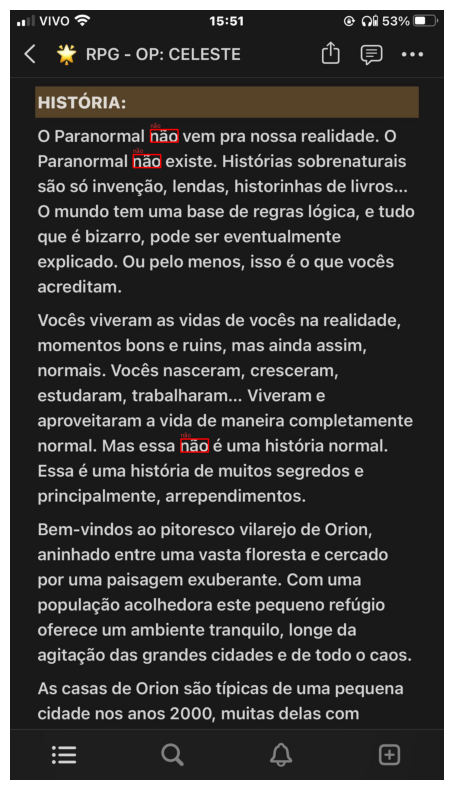


	--> rpg2.jpg
Número de ocorrências para não em rpg2.jpg: 1




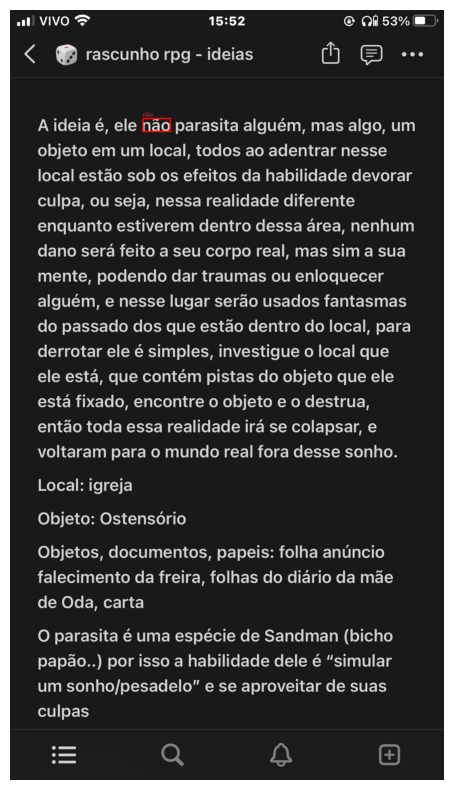

In [82]:

for imagem in caminho:
  img = cv2.imread(imagem) #carrega a imagem
  img_original = img.copy() #cria uma cópia da imagem para não escrever em cima da original

  nome_imagem = os.path.split(imagem)[-1] # passa a imagem e acessa a última posição do diretório
  print('\n\t--> ' + str(nome_imagem))  # separação + nome da imagem

  img, numero_ocorrencias = OCR_processa_imagem(img, termo_pesquisa, config_tesseract, min_conf) #usando o OCR_processa_imagem
  print('Número de ocorrências para {} em {}: {}'.format(termo_pesquisa, nome_imagem, numero_ocorrencias))
    #primeira chaves é para termo de pesquisa e a segunda nome das imagens e a terceira é o numeros de ocorrencias
  print('\n')
  if (numero_ocorrencias != 0):
    mostrar(img)
